In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary Data.csv')

In [3]:
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [4]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

In [5]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [6]:
df.tail()

,Experience Years,Salary
35,9.0,105582
36,9.5,116969
37,9.6,112635
38,10.3,122391
39,10.5,121872


In [7]:
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [8]:
df.dtypes

Experience Years    float64
Salary                int64
dtype: object

<AxesSubplot:xlabel='Experience Years', ylabel='Salary'>

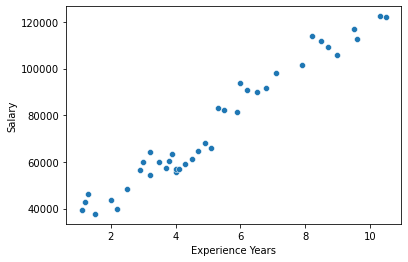

In [9]:
sns.scatterplot(x='Experience Years',y='Salary',data=df)

# Linear Regression Manual

In [10]:
x = df['Experience Years']
y = df['Salary']

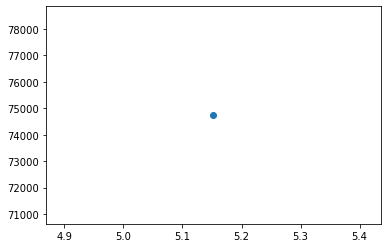

In [11]:
plt.scatter(x.mean(),y.mean())

In [12]:
m = sum((x-x.mean())*(y-y.mean()))/sum((x-x.mean())**2)

In [13]:
c = y.mean()-m*x.mean()

In [14]:
m*1.1+c

36149.031318689755

In [15]:
y=m*x+c

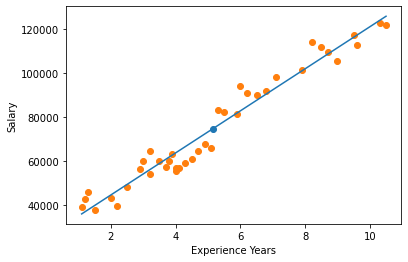

In [16]:

plt.plot(x, y)
plt.scatter(x.mean(),y.mean())
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel("Experience Years")
plt.ylabel('Salary')
plt.show()

# Linear Regression using Scikit Learn 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [19]:
x = df[['Experience Years']]

In [20]:
reg.fit(x,y)

LinearRegression()

In [21]:
print(m)
print(reg.coef_)

9523.650507417706
[9523.65050742]


In [22]:
print(c)
print(reg.intercept_)

25673.01576053028
25673.015760530267


In [23]:
reg.predict([[1.1]])

array([36149.03131869])

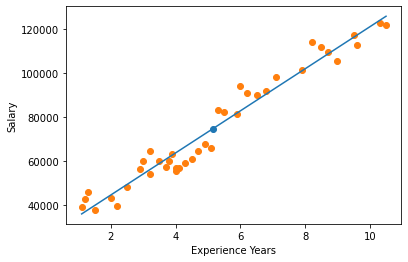

In [24]:

plt.plot(x, reg.predict(x))
plt.scatter(x.mean(),y.mean())
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel("Experience Years")
plt.ylabel('Salary')
plt.show()

In [25]:
df['Predicted Salary'] = reg.predict(x)

# Lose and Cost function


In [26]:
df['Lose'] = df['Salary'] - df['Predicted Salary']

In [27]:
df.head()

,Experience Years,Salary,Predicted Salary,Lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error = mean_absolute_error(df['Salary'],df['Predicted Salary'])
mean_squared_error = mean_squared_error(df['Salary'],df['Predicted Salary'])


print("mean absolute error is ",mean_absolute_error)
print("mean squared error is ",mean_squared_error)


mean absolute error is  4516.281792544623
mean squared error is  28960383.653776206


In [29]:
mean_absolute_error = sum(abs(df['Salary']-df['Predicted Salary']))/len(x)

mean_absolute_error

4516.281792544622

In [30]:
mean_squared_error = sum((df['Salary']-df['Predicted Salary'])**2)/len(x)

In [31]:
mean_squared_error

28960383.6537762

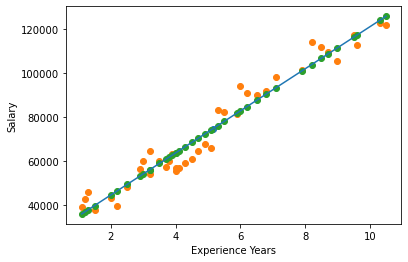

In [32]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(),y.mean())
plt.scatter(df['Experience Years'],df['Salary'])
plt.scatter(df['Experience Years'],reg.predict(df[['Experience Years']]))
plt.xlabel("Experience Years")
plt.ylabel('Salary')
plt.show()

# R2 Squared Value / Accurecy for Regression

In [33]:
reg.score(x,y)

1.0

In [34]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

1.0

In [35]:
R2 = 1-((sum(df['Salary'] - df['Predicted Salary'])**2)/(sum((df['Salary'] -df['Salary'].mean())**2)))

In [36]:
print("R2 Squared Value is ",R2)

R2 Squared Value is  1.0
